In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
df = pd.read_csv('grocery_data_mostrecent.csv')
df.head(10)

,Date,Item,Price,Quantity,Mode of Payment
0,04-01-2022,eggs,2.19,1,Debit Card
1,07-01-2022,eggs,2.19,2,Cash
2,07-01-2022,bread,2.99,3,Cash
3,07-01-2022,rice,5.99,1,Cash
4,08-01-2022,yogurt,1.99,1,Cash
5,08-01-2022,granola bars,3.29,2,Cash
6,09-01-2022,mushrooms,2.49,2,Debit Card
7,10-01-2022,sauerkraut,3.49,2,Credit Card
8,11-01-2022,milk,3.49,2,Credit Card
9,11-01-2022,bread,2.99,2,Credit Card


In [5]:
df.shape

(6728, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6728 entries, 0 to 6727
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             6728 non-null   object 
 1   Item             6728 non-null   object 
 2   Price            6728 non-null   float64
 3   Quantity         6728 non-null   int64  
 4   Mode of Payment  6728 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 262.9+ KB


In [7]:
df.describe(include='all')

,Date,Item,Price,Quantity,Mode of Payment
count,6728,6728,6728.000000,6728.000000,6728
unique,829,124,NaN,NaN,3
top,12-02-2024,rice,NaN,NaN,Cash
freq,20,212,NaN,NaN,2427
mean,NaN,NaN,3.674230,2.997622,NaN
std,NaN,NaN,2.374021,1.421655,NaN
min,NaN,NaN,0.690000,1.000000,NaN
25%,NaN,NaN,1.990000,2.000000,NaN
50%,NaN,NaN,2.990000,3.000000,NaN
75%,NaN,NaN,4.990000,4.000000,NaN


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')

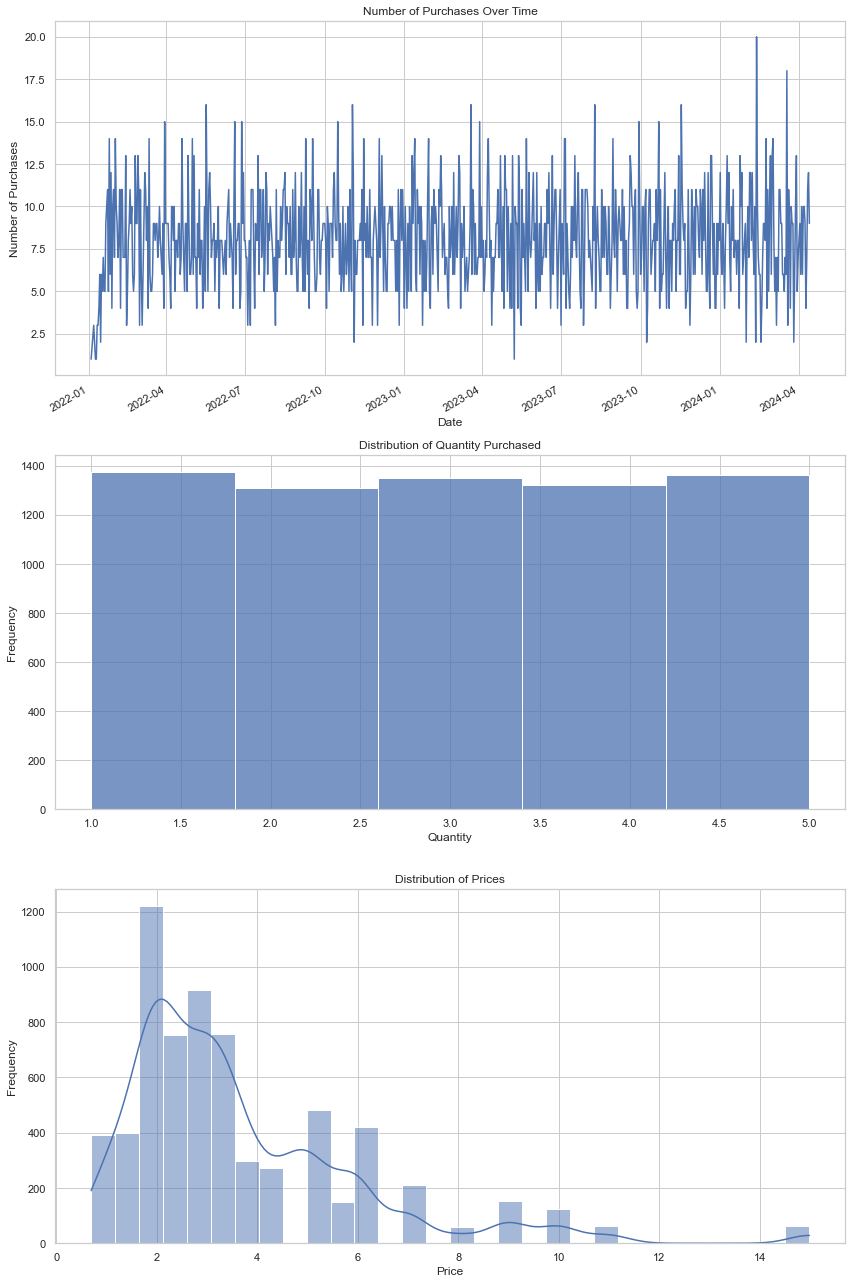

In [9]:
# Setting up the visualization environment
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Distribution of purchases over time
df['Date'].value_counts().sort_index().plot(ax=axs[0], title="Number of Purchases Over Time")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Number of Purchases")

# Plot 2: Distribution of Quantities
sns.histplot(df['Quantity'], bins=5, kde=False, ax=axs[1])
axs[1].set_title("Distribution of Quantity Purchased")
axs[1].set_xlabel("Quantity")
axs[1].set_ylabel("Frequency")

# Plot 3: Distribution of Prices
sns.histplot(df['Price'], bins=30, kde=True, ax=axs[2])
axs[2].set_title("Distribution of Prices")
axs[2].set_xlabel("Price")
axs[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

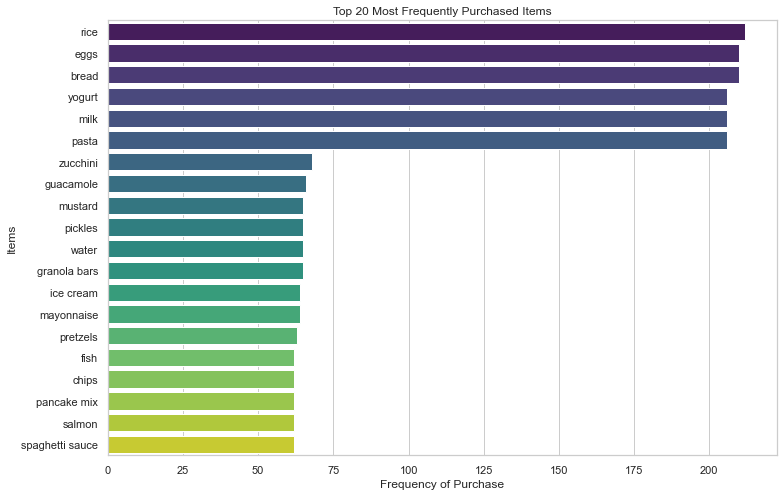

rice               212
eggs               210
bread              210
yogurt             206
milk               206
pasta              206
zucchini            68
guacamole           66
mustard             65
pickles             65
water               65
granola bars        65
ice cream           64
mayonnaise          64
pretzels            63
fish                62
chips               62
pancake mix         62
salmon              62
spaghetti sauce     62
Name: Item, dtype: int64

In [10]:
# Step 1: Analyze Popular Items
# Count the frequency of each item purchased
item_frequency = df['Item'].value_counts().head(20)  # Top 20 most frequent items

# Plotting the top 20 most popular items
plt.figure(figsize=(12, 8))
sns.barplot(x=item_frequency.values, y=item_frequency.index, palette='viridis')
plt.title('Top 20 Most Frequently Purchased Items')
plt.xlabel('Frequency of Purchase')
plt.ylabel('Items')
plt.show()

item_frequency


In [11]:
# Creating the binary matrix using get_dummies for the 'Item' column
binary_matrix = pd.get_dummies(df.set_index(['Date', 'Mode of Payment']).Item).groupby(level=[0, 1]).max()

# Calculating the co-occurrence matrix by multiplying the binary matrix transpose by the binary matrix
co_occurrence_matrix_corrected = binary_matrix.T.dot(binary_matrix)

# Display a subset of the corrected co-occurrence matrix
co_occurrence_matrix_corrected.iloc[:10, :10] 

,almond extract,apples,avocado,bacon,bananas,barbecue sauce,beef,bell peppers,bouillon cubes,bread
almond extract,29,4,0,3,1,3,2,4,2,6
apples,4,59,2,2,4,3,6,4,3,10
avocado,0,2,60,8,3,5,1,3,6,14
bacon,3,2,8,60,7,4,3,4,3,14
bananas,1,4,3,7,59,3,5,10,2,12
barbecue sauce,3,3,5,4,3,60,8,4,3,16
beef,2,6,1,3,5,8,61,2,0,14
bell peppers,4,4,3,4,10,4,2,60,2,14
bouillon cubes,2,3,6,3,2,3,0,2,30,10
bread,6,10,14,14,12,16,14,14,10,210


In [12]:
def recommend_items(bought_item, co_occurrence_df, top_n=5):
    """
    Recommend items based on a given item.
    
    Parameters:
        bought_item (str): The item that the user has bought.
        co_occurrence_df (DataFrame): The co-occurrence matrix of item purchases.
        top_n (int): The number of items to recommend.
    
    Returns:
        recommended_items (list): List of recommended items.
    """
    if bought_item in co_occurrence_df.index:
        # Get all other items co-occurrence frequencies with the bought item
        item_co_occurrences = co_occurrence_df.loc[bought_item]
        
        # Exclude the bought item and sort the others based on frequency, descending
        recommendations = item_co_occurrences[item_co_occurrences.index != bought_item].sort_values(ascending=False).head(top_n)
        
        return recommendations.index.tolist()
    else:
        return []

# Example usage: Recommend items that are frequently bought with 'eggs'
recommended_for_eggs = recommend_items('mushrooms', co_occurrence_matrix_corrected)
recommended_for_eggs


['bread', 'rice', 'yogurt', 'milk', 'pasta']

The recommendation system we developed, which predicts the next most likely product a customer will purchase, primarily relies on the item-based collaborative filtering approach using a co-occurrence matrix. Here are the key factors and mechanisms that influence the predictions:

1. Purchase Co-occurrence
The fundamental factor is the frequency with which two items are purchased together. This is captured in the co-occurrence matrix, where each entry indicates how many times pairs of items have been bought in the same transaction. The system uses this data to suggest items that have historically been bought frequently with the given item.

2. Item Popularity
Implicitly, the system also takes into account the popularity of items. Items that are bought more frequently in general are more likely to appear as recommendations because they have a higher chance of co-occurring with multiple other items. This is a natural outcome of the method used to build the co-occurrence matrix.

3. Transaction History
The entire recommendation is based on historical transaction data. The patterns detected in past purchase behaviors dictate the recommendations. If certain combinations of purchases were common in the past, the system assumes these patterns will continue.

4. Number of Transactions
The robustness of the recommendation depends on the number of transactions recorded. More transactions provide a richer data set, which allows for more accurate and reliable predictions. Sparse data might lead to less effective recommendations.

Limitations and Considerations:

Single-Level Recommendations: The current setup recommends items based solely on one previously bought item. It does not consider sequences of purchases or more complex patterns (e.g., sequential decision making).

Static Data: The recommendations are static and based on past data. They do not adapt in real-time to changes in consumer behavior or inventory changes unless the dataset is regularly updated.

Lack of Personalization: This model does not account for individual customer preferences beyond what can be inferred from purchase co-occurrences. It does not use demographic data or personalized customer profiles.
Enhancement Possibilities

Incorporate More Data: Including customer demographics, seasonal variations, and external factors like promotions could refine the recommendations.

Adaptive Algorithms: Use machine learning models that can adapt over time to changes in consumer behavior and update recommendations accordingly.

Multi-Level Recommendations: Consider sequences of purchases or utilize algorithms that can handle multiple items to refine recommendations based on more complex patterns.
